# <img src='../imgs/OOIPY_Logo.png' align="center" width=100> Demo Notebook - Hydrophone Data

This Jupyter Notebook walks through the basic functionality of OOIpy

## In this demo you will learn:
- How to download broadband (Fs=64kHz) and low frequency (Fs = 200) Hz from OOI server
- How to compute spectrograms and PSDs from the data
- How to save spectrograms and PSDs to pickle files
- How to plot hydrophone data, spectrograms and PSDs
- How to save Hydrophone Data to .wav file

## Environment Setup

In [18]:
import ooipy
import datetime
from matplotlib import pyplot as plt


## Download Data from OOI

The functions ooipy.request.hydrophone_request.get_acoustic_data and ooipy.request.hydrophone_request.get_acoustic_data_LF require node string that specifies the OOI node to get data from. The available nodes are listed below

### Broadband Hydrophones
* [Oregon Shelf Base Seafloor (Fs = 64 kHz)](https://ooinet.oceanobservatories.org/data_access/?search=CE02SHBP-LJ01D-11-HYDBBA106)
    * 'LJ01D'
* [Oregon Slope Base Seafloor (Fs = 64 kHz)](https://ooinet.oceanobservatories.org/data_access/?search=RS01SLBS-LJ01A-09-HYDBBA102)
    * 'LJ01A'
* [Slope Base Shallow (Fs = 64 kHz)](https://ooinet.oceanobservatories.org/data_access/?search=RS01SBPS-PC01A-08-HYDBBA103)
    * 'PC01A'
* [Axial Base Shallow Profiler (Fs = 64 kHz)](https://ooinet.oceanobservatories.org/data_access/?search=RS03AXPS-PC03A-08-HYDBBA303)
    * 'PC03A'
* [Offshore Base Seafloor (Fs = 64 kHz)](https://ooinet.oceanobservatories.org/data_access/?search=CE04OSBP-LJ01C-11-HYDBBA105)
    * 'LJ01C'
* [Axial Base Seafloor (Fs = 64 kHz)](https://ooinet.oceanobservatories.org/data_access/?search=RS03AXBS-LJ03A-09-HYDBBA302)
    * 'LJ03A'
    
### Low Frequency Hydrophones
* [Axial Base Seaflor (Fs = 200 Hz)](https://ooinet.oceanobservatories.org/data_access/?search=RS03AXBS-MJ03A-05-HYDLFA301)
    * 'Axial_Base'
    * 'AXABA1'
* [Central Caldera (Fs = 200 Hz)](https://ooinet.oceanobservatories.org/data_access/?search=RS03CCAL-MJ03F-06-HYDLFA305)
    * 'Central_Caldera'
    * 'AXCC1'
* [Eastern Caldera (Fs = 200 Hz)](https://ooinet.oceanobservatories.org/data_access/?search=RS03ECAL-MJ03E-09-HYDLFA304)
    * 'Eastern_Caldera'
    * 'AXEC2'
* [Southern Hydrate (Fs = 200 Hz)](https://ooinet.oceanobservatories.org/data_access/?search=RS01SUM1-LJ01B-05-HYDLFA104)
    * 'Southern_Hydrate'
    * 'HYS14'
* ['Oregon Slope Base Seafloor (Fs = 200 Hz)](https://ooinet.oceanobservatories.org/data_access/?search=RS01SLBS-MJ01A-05-HYDLFA101)
    * 'Slope_Base'
    * 'HYSB1'

For more detailed information about hydrophones nodes see https://ooinet.oceanobservatories.org/

For a map of hydrophones supported by OOIpy, see https://www.google.com/maps/d/u/1/viewer?mid=1_QKOPTxX2m5CTwgKR5fAGLO0lmbBgT7w&ll=45.16765319565428%2C-127.15744999999998&z=7

In [2]:
# Specify start time, end time, and node for data download (1 minutes of data)
start_time = datetime.datetime(2017,7,1,0,0,0)
end_time = datetime.datetime(2017,7,1,0,1,0)
node1 = 'LJ01D'
node2 = 'Eastern_Caldera'

# Download Broadband data
print('Downloading Broadband Data:')
hdata_broadband = ooipy.get_acoustic_data(start_time, end_time, node1, verbose=True)
print('')
print('Downloading Low Frequency Data:')
hdata_lowfreq = ooipy.get_acoustic_data_LF(start_time, end_time, node2, verbose=True, zero_mean=True)

Fetching URLs...
Sorting valid URLs for Time Window...



The returned data type is the [ooipy.hydrophone.basic.HydrophoneData](https://ooipy.readthedocs.io/en/latest/hydrophone.html#ooipy.hydrophone.basic.HydrophoneData) object.

To see the data stats, do the following:

In [3]:
print(hdata_broadband.stats)

         network: OO
         station: HYEA2
        location: LJ01D
         channel: YDH
       starttime: 2017-06-30T23:59:59.999999Z
         endtime: 2017-07-01T00:00:59.999999Z
   sampling_rate: 64000.0
           delta: 1.5625e-05
            npts: 3840001
           calib: 1.0
         _format: MSEED
           mseed: AttribDict({'dataquality': 'D', 'number_of_records': 6324, 'encoding': 'STEIM2', 'byteorder': '>', 'record_length': 4096, 'filesize': 25903104})
      processing: ['ObsPy 1.3.0: trim(endtime=UTCDateTime(2017, 7, 1, 0, 1)::fill_value=None::nearest_sample=True::pad=False::starttime=UTCDateTime(2017, 7, 1, 0, 0))']


In [4]:
print(hdata_lowfreq.stats)

         network: OO
         station: AXEC2
        location: AXEC2
         channel: HDH
       starttime: 2017-07-01T00:00:00.000000Z
         endtime: 2017-07-01T00:01:00.000000Z
   sampling_rate: 200.0
           delta: 0.005
            npts: 12001
           calib: 1.0
         _format: MSEED
           mseed: AttribDict({'dataquality': 'D', 'number_of_records': 12, 'encoding': 'FLOAT32', 'byteorder': '>', 'record_length': 4096, 'filesize': 49152})


The HydrophoneData object can be saved as a ['pickle', 'wav', 'nc', 'mat'] file type using the save method:

In [17]:
hdata_broadband.save('nc', 'test_data')

### Plot Time Series Data
- the HydrophoneData method inherits from an obspy stream object and therefore has all of the functionality of this object (including plotting time series)

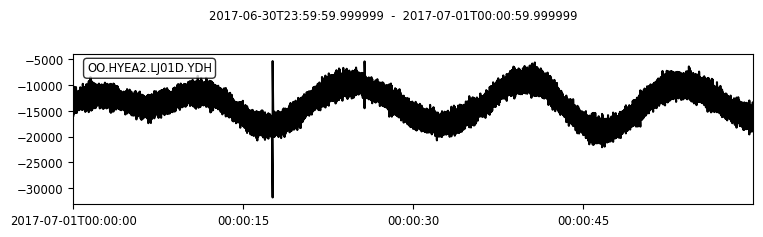

In [6]:
_ = hdata_broadband.plot()

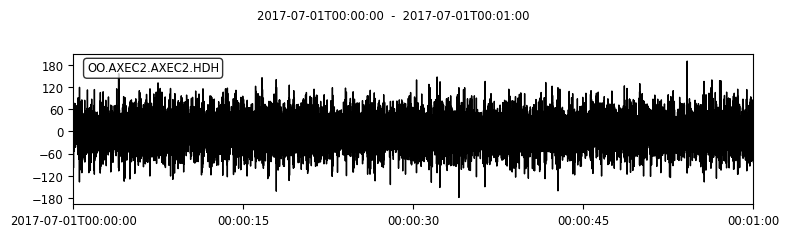

In [7]:
_ = hdata_lowfreq.plot()

### Computing Spectrograms and PSDs
- units are calibrated. Calibration sheets can be found [here](https://github.com/OOI-CabledArray/calibrationFiles)
- returns an xarray DataArray. Xarray plotting routines can be used to visualize.

In [12]:
spec1 = hdata_broadband.compute_spectrogram()
spec2 = hdata_lowfreq.compute_spectrogram(avg_time=15, L=512)

psd1 = hdata_broadband.compute_psd_welch()
psd2 = hdata_lowfreq.compute_psd_welch()

TODO - add plotting section once the outputs are xarray

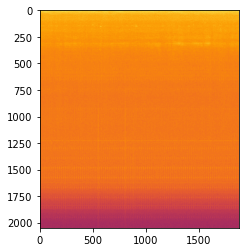

In [16]:
plt.imshow(spec1.values.T, cmap='inferno')

/Users/John/Code/ocean_acoustics/ooipy/ooipy/tools/ooiplotlib.py:215: UserWarning: The following kwargs were not used by contour: 'fmin', 'fmax', 'res_reduction_time', 'xlabel_rot', 'plot', 'save', 'filename', 'title', 'xlabel', 'xlabel_format', 'ylabel', 'vdelta', 'vdelta_cbar', 'figsize', 'res_reduction_freq', 'dpi', 'fontsize'
  **kwargs


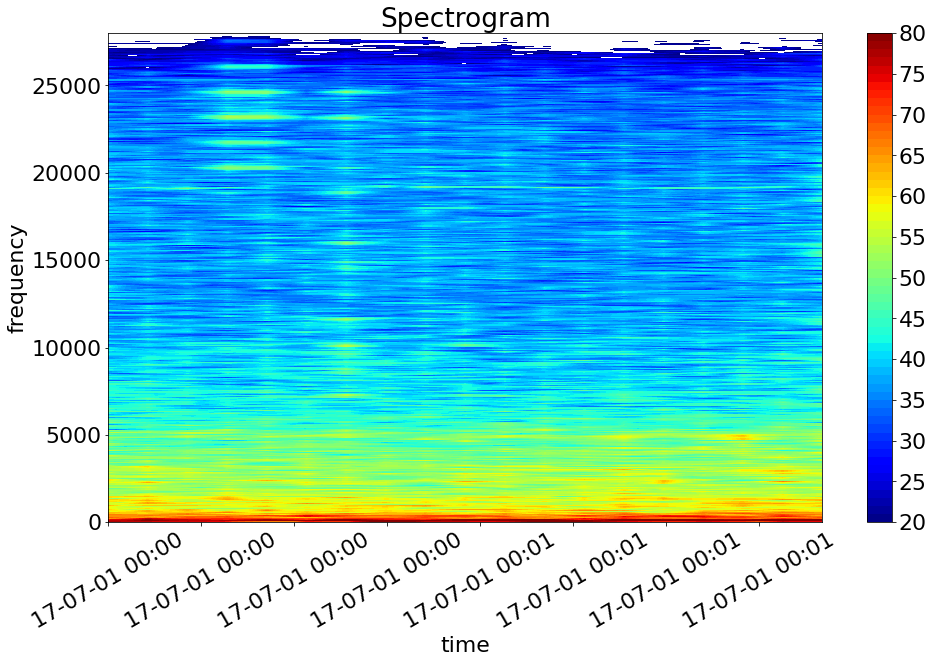

In [9]:
ooipy.plot(spec1, fmin=0, fmax=28000, res_reduction_time=100, xlabel_rot=30)

/Users/John/Code/ocean_acoustics/ooipy/ooipy/tools/ooiplotlib.py:215: UserWarning: The following kwargs were not used by contour: 'fmin', 'fmax', 'xlabel_rot', 'plot', 'save', 'filename', 'title', 'xlabel', 'xlabel_format', 'ylabel', 'vdelta', 'vdelta_cbar', 'figsize', 'res_reduction_time', 'res_reduction_freq', 'dpi', 'fontsize'
  **kwargs


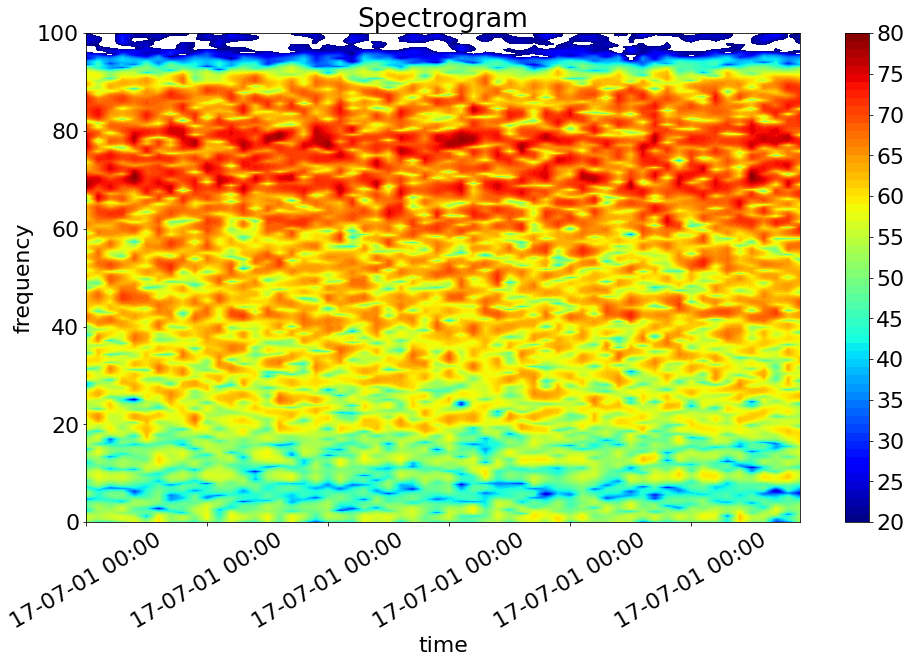

In [10]:
ooipy.plot(spec2, fmin=0, fmax=100, xlabel_rot=30)

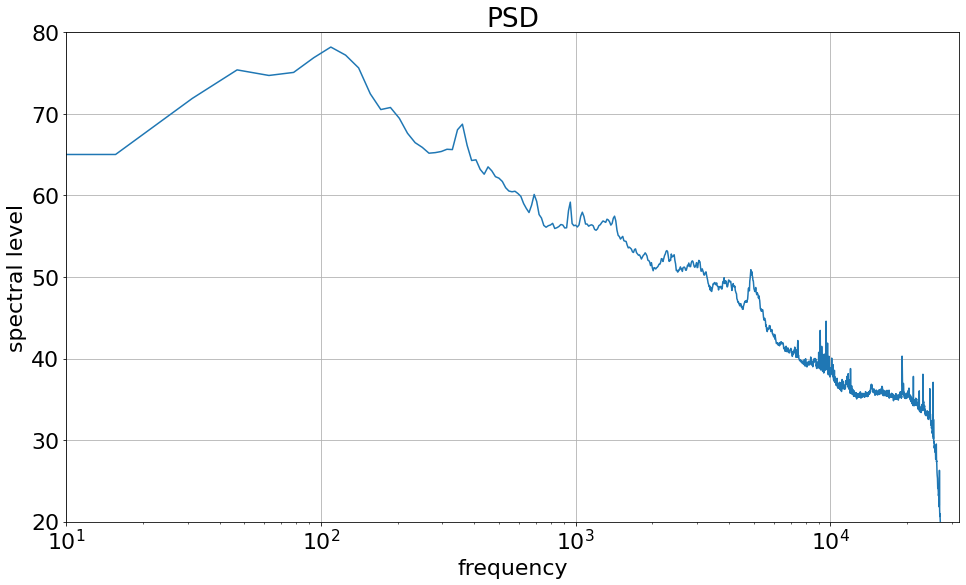

In [11]:
ooipy.plot(psd1, fmin=10, fmax=32000)

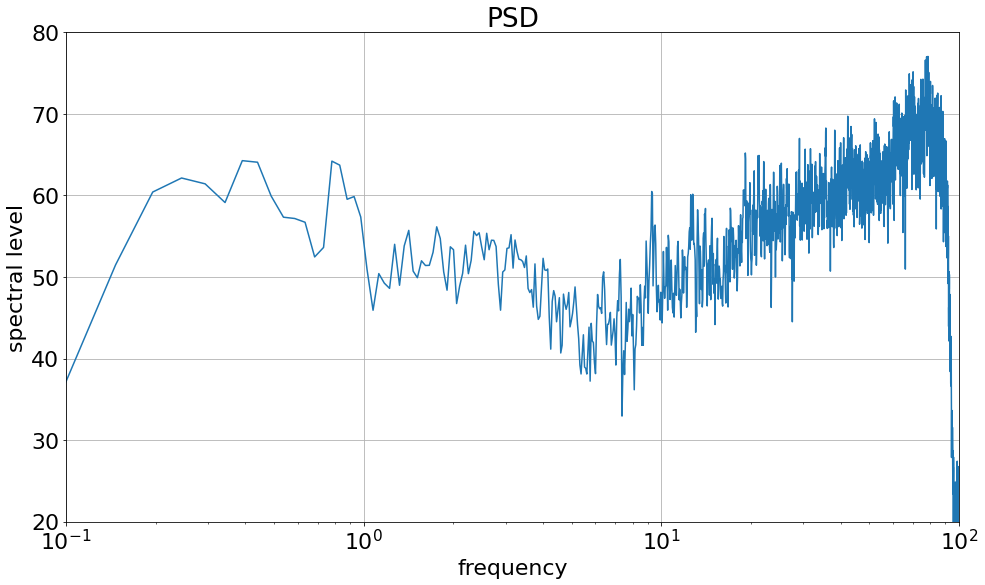

In [12]:
ooipy.plot(psd2, fmin=0.1,fmax=100)

To save a spectrogram or PSD to pickle file, use the save() method of the Spectrogram or PSD class

In [13]:
psd2.save(filename='psd2.pkl')
spec2.save(filename='spec2.pkl')

### Save Hydrophone Data to Wav File
to save the data to a wav file, use the wav_write method of the HydrophoneData class.

Options include normalizing waveform (for media player playback), and changing the sample rate to desired sample rate.
Note, normalize option only works if data is already zero mean

In [14]:
hdata_broadband.wav_write(filename='raw_data.wav')
hdata_lowfreq.wav_write(filename='audio_for_playback.wav', norm=True, new_sample_rate=44100)

### Different PSD estimators
Due to several co-located sound sources, it may be usefull to use median based psd estimates instead of mean based estimates. See [paper](https://ieeexplore.ieee.org/abstract/document/9415074) more info
- here's a quick example of the difference with OOI data

[ 41.6         41.59882812  41.59765625 ...,  44.35748762  44.35671411
  44.35594059]
[ 41.6         41.59882812  41.59765625 ...,  44.35748762  44.35671411
  44.35594059]


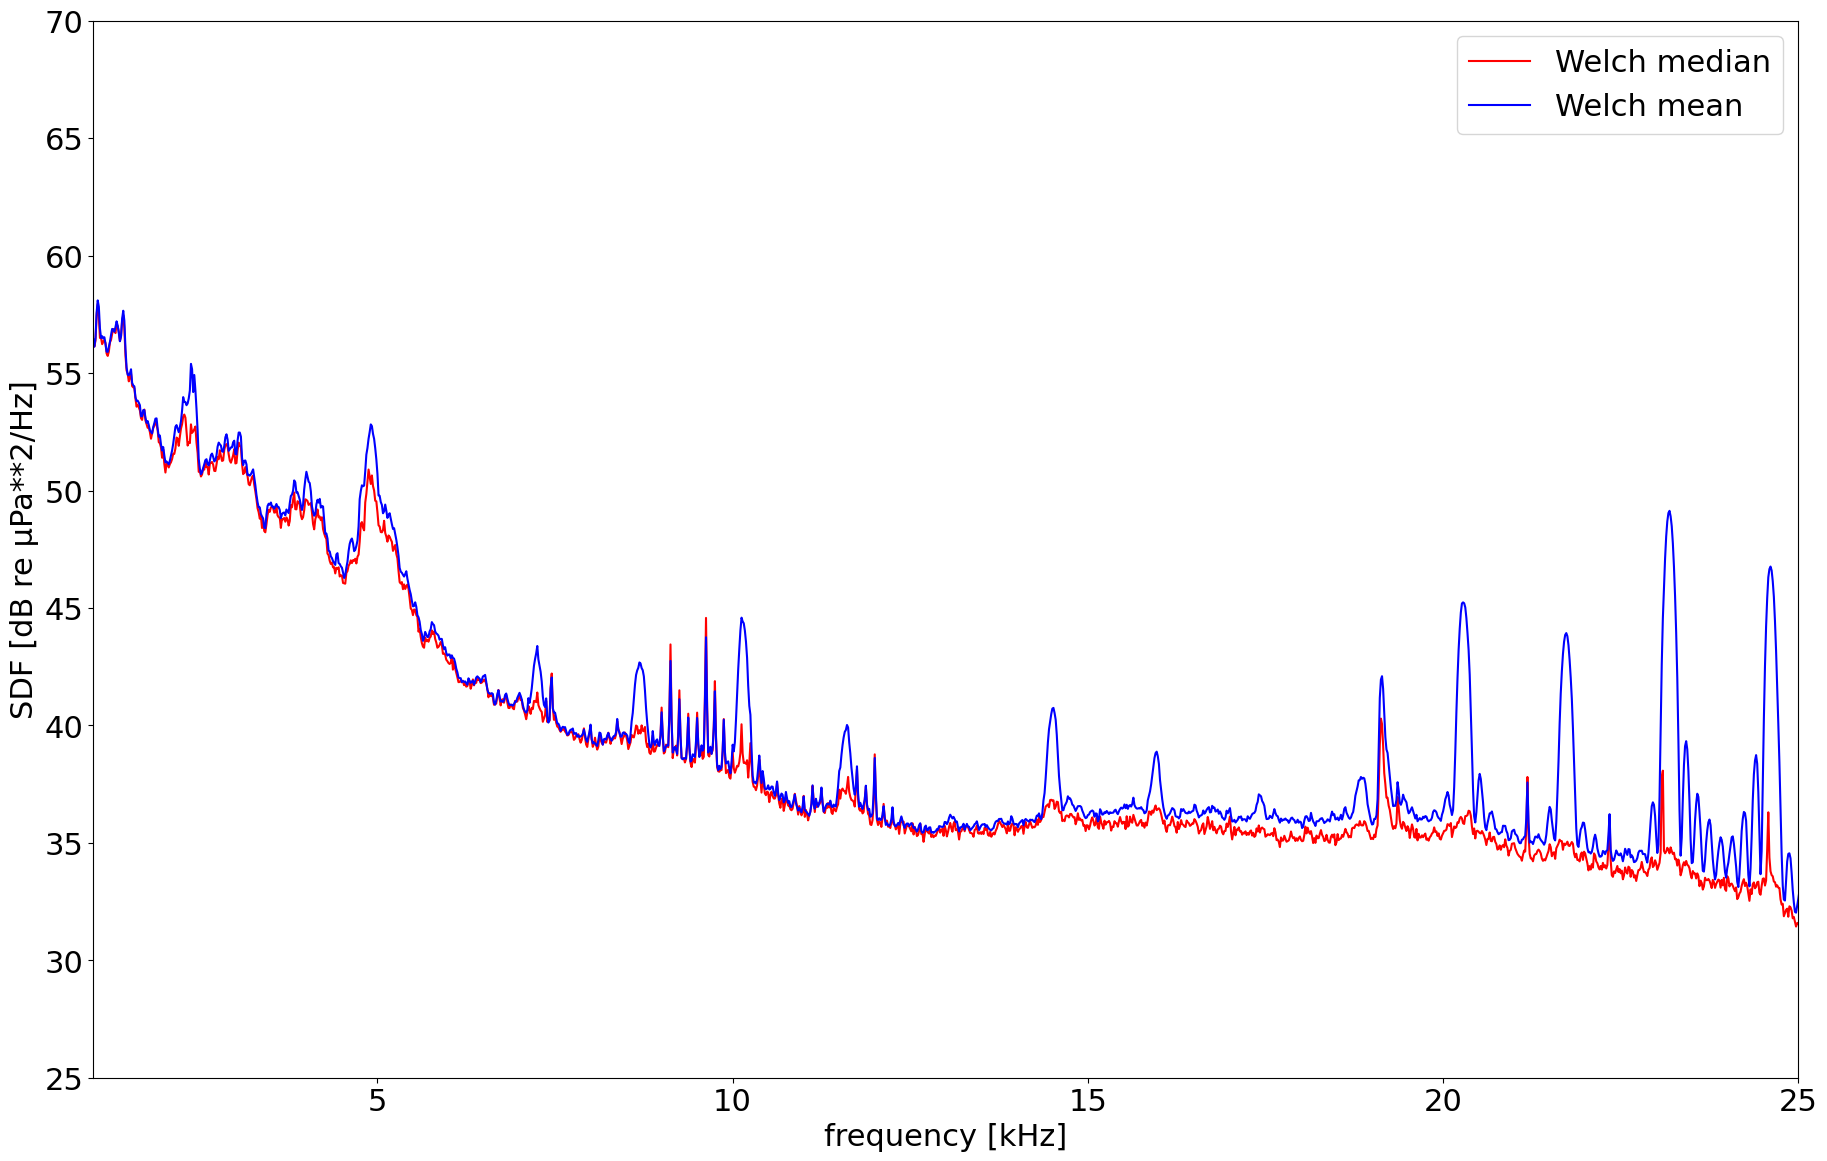

In [15]:
# power spectral density estimate of noise data using Welch's method
fig, ax = plt.subplots(figsize=(22,14), dpi=100)

# 1. using median averaging (default)
hdata_broadband.compute_psd_welch()

f = hdata_broadband.psd.freq / 1000
plt.plot(f, hdata_broadband.psd.values, label='Welch median',color='r')

# 2. using mean averaging
hdata_broadband.compute_psd_welch(avg_method='mean')

plt.plot(f, hdata_broadband.psd.values, label='Welch mean',color='b')
plt.xlabel('frequency [kHz]')
plt.ylabel('SDF [dB re µPa**2/Hz]')
plt.xlim(1,25)
plt.ylim(25,70)
plt.legend()